In [1]:
import pyreadstat
df_wave1, meta = pyreadstat.read_sav("data/W1 Merged Data/Wave.1_Data/Merge/Wave1_20170906.sav")
df_wave1.head(10)

,country,idnumber,level3,yrsurvey,se002,se003,se003a,se004,se004a,se005,...,ir010e,w_jp,w_hk,w_kr,w_cn,w_mo,w_ph,w_tw,w_th,w_all
0,4.0,1.0,1.0,2002.0,1.0,5.0,38.0,NaN,1.0,5.0,...,NaN,NaN,NaN,NaN,0.621390,NaN,NaN,NaN,NaN,0.62
1,4.0,2.0,1.0,2002.0,2.0,10.0,60.0,NaN,1.0,4.0,...,NaN,NaN,NaN,NaN,0.446785,NaN,NaN,NaN,NaN,0.45
2,4.0,3.0,1.0,2002.0,2.0,10.0,69.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,0.583658,NaN,NaN,NaN,NaN,0.58
3,4.0,4.0,1.0,2002.0,2.0,5.0,39.0,NaN,1.0,8.0,...,NaN,NaN,NaN,NaN,0.490000,NaN,NaN,NaN,NaN,0.49
4,4.0,5.0,1.0,2002.0,1.0,7.0,48.0,NaN,1.0,4.0,...,NaN,NaN,NaN,NaN,0.396647,NaN,NaN,NaN,NaN,0.40
5,4.0,6.0,1.0,2002.0,1.0,10.0,64.0,NaN,1.0,4.0,...,NaN,NaN,NaN,NaN,0.479041,NaN,NaN,NaN,NaN,0.48
6,4.0,7.0,1.0,2002.0,2.0,2.0,23.0,NaN,2.0,5.0,...,NaN,NaN,NaN,NaN,1.473766,NaN,NaN,NaN,NaN,1.47
7,4.0,8.0,1.0,2002.0,2.0,10.0,63.0,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,0.446785,NaN,NaN,NaN,NaN,0.45
8,4.0,9.0,1.0,2002.0,1.0,10.0,66.0,NaN,1.0,4.0,...,NaN,NaN,NaN,NaN,0.409378,NaN,NaN,NaN,NaN,0.41
9,4.0,10.0,1.0,2002.0,2.0,3.0,26.0,NaN,1.0,4.0,...,NaN,NaN,NaN,NaN,1.118153,NaN,NaN,NaN,NaN,1.12


In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib as plt 

In [3]:
data_dictionary = pd.read_csv("D2-ABS1+2.csv", header=1)

In [4]:
def select_important_columns(data_dictionary, dataset):
  col_names = data_dictionary["ABS1_Coding_name"][0:-6]
  return df_wave1[col_names]

In [5]:
merged_data = pd.merge(df_wave1[['country']], select_important_columns(data_dictionary, df_wave1))

In [6]:
col_need = ['se009', 'q006', 'q098', 'q005', 'q105', 'q106', 'q121', 'q123', 'q127', 'q128', 'q008', 'q009', 'q010']
#meta.variable_value_labels[col_need]
a_subset = {key: meta.variable_value_labels[key] for key in col_need}
a_subset

{'se009': {1.0: 'lowest quintile',
  2.0: '2nd quintile',
  3.0: '3rd quintile',
  4.0: '4th quintile',
  5.0: '5th quintile',
  97.0: 'Not applicable',
  98.0: "Don't Know",
  99.0: 'No Answer'},
 'q006': {1.0: 'Much Worse',
  2.0: 'A little Worse',
  3.0: 'About the same',
  4.0: 'A little Better',
  5.0: 'Much Better',
  98.0: "Don't know",
  99.0: 'No answer'},
 'q098': {1.0: 'Not at all satisfied',
  2.0: 'Not very satisfied',
  3.0: 'Fairly satisfied',
  4.0: 'Very satisfied',
  98.0: "Don't know",
  99.0: 'No answer'},
 'q005': {1.0: 'Much worse now',
  2.0: 'A little worse now',
  3.0: 'About the same',
  4.0: 'A little better now',
  5.0: 'Much better now',
  98.0: "Don't know",
  99.0: 'No answer'},
 'q105': {1.0: 'Much worse',
  2.0: 'Somewhat worse',
  3.0: 'Much the same',
  4.0: 'Somewhat better',
  5.0: 'Much better than before',
  97.0: 'Not Applicable',
  98.0: "Don't know",
  99.0: 'No answer'},
 'q106': {1.0: 'Much worse',
  2.0: 'Somewhat worse',
  3.0: 'Much the sa

In [7]:
#meta.variable_value_labels[col_need]
b_subset = {key: meta.column_names_to_labels[key] for key in merged_data.columns}
b_subset

{'country': 'Country',
 'se002': 'gender',
 'se004': 'marital status',
 'se005': 'education',
 'se009': 'annual income: national quintiles',
 'se003a': 'actual age',
 'q007': 'How much trust do you have in the courts?',
 'q008': 'How much trust do you have in the national government?',
 'q009': 'How much trust do you have in political parties?',
 'q010': 'How much trust do you have in Parliament?',
 'q006': 'What do you think the economic situation of your family will be five years from now?',
 'q098': 'Satisfaction with the way democracy works in our country?',
 'q128': 'The nation is run by a powerful few and ordinary citizens cannot do much about it',
 'q005': 'How would you compare the current economic condition of your family with what it was five years ago?',
 'q027': 'Have you participated in last election?',
 'q028': 'Which party did you vote for?',
 'q105': 'Everyone is free to say what they think- is better than before?',
 'q106': 'Everyone is treated equally by the governmen

In [8]:
# merged_data.describe()

In [9]:
# merged_data.q007.value_counts()

In [10]:
merged_data.isna().sum()
# merged_data.q007.value_counts()

country           0
se002         12368
se004      10154431
se005         68666
se009       1310033
se003a      1350731
q007        2481561
q008        1300395
q009        1130763
q010        1771056
q006        2710052
q098        2065936
q128        2689416
q005         133284
q027        4760657
q028       14673905
q105        1838917
q106        2347510
q121       10639269
q123        2048706
q127        2278003
dtype: int64

In [11]:
for i in merged_data.columns: 
    print(merged_data[i].value_counts()) 

4.0    10131489
8.0     2390116
3.0     2250000
1.0     2010724
7.0     2002225
6.0     1440000
5.0     1308736
2.0      657721
Name: country, dtype: int64
2.0    11315404
1.0    10863239
Name: se002, dtype: int64
1.0    8497094
6.0    2122717
3.0     623210
2.0     532923
5.0     163046
4.0      97590
Name: se004, dtype: int64
7.0     3403228
3.0     3267894
4.0     3182182
1.0     3132401
5.0     2881906
8.0     2121787
9.0     1873453
2.0     1508426
6.0      550719
10.0     200349
Name: se005, dtype: int64
5.0    6093900
2.0    4234562
1.0    4123724
3.0    3263022
4.0    3165770
Name: se009, dtype: int64
39.0     667027
40.0     649421
37.0     643817
36.0     581571
45.0     580685
          ...  
90.0       7565
86.0       7081
89.0       4030
93.0       1418
109.0      1200
Name: se003a, Length: 75, dtype: int64
3.0    7440957
4.0    6134347
2.0    4786306
1.0    1347840
Name: q007, dtype: int64
4.0    9768454
2.0    4944759
3.0    4870673
1.0    1306730
Name: q008, dtype: int6

In [12]:
from pandas.api.types import CategoricalDtype
cat1 = CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0], ordered=True)
cat2 = CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0], ordered=True)
for column in merged_data.columns:
  if column != "se003a":
    if column == "q006" or column == "q005" or column == "q105" or column == "q106" or column == "se009":
      merged_data[column] = merged_data[column].astype(cat1)
    if column == "q098" or column == "q123" or column == "q121" or column == "q127" \
        or column == "q128" or column == "q008" or column == "q009" or column == "q010":
            merged_data[column] = merged_data[column].astype(cat2)
    merged_data[column] = merged_data[column].astype("category")

In [13]:
merged_data_copy = merged_data.drop(['se004', 'q028', 'q121'], axis=1)

In [14]:
merged_data_sample = merged_data.groupby("country")\
    .sample(n = 1000, replace = True, random_state = 0).reset_index(drop=True)

In [15]:
merged_data_copy = merged_data_sample.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [16]:
# merged_data_copy.to_csv('merged_data.csv', index=False)

In [17]:
merged_data_copy.isna().sum()

country    0
se002      0
se004      0
se005      0
se009      0
se003a     0
q007       0
q008       0
q009       0
q010       0
q006       0
q098       0
q128       0
q005       0
q027       0
q028       0
q105       0
q106       0
q121       0
q123       0
q127       0
dtype: int64

(array([ 721.,  969., 2537., 1113., 1013.,  644.,  609.,  307.,   73.,
          14.]),
 array([18. , 25.5, 33. , 40.5, 48. , 55.5, 63. , 70.5, 78. , 85.5, 93. ]),
 <BarContainer object of 10 artists>)

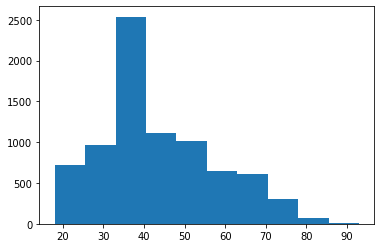

In [18]:
plt.pyplot.hist(merged_data_copy['se003a'])

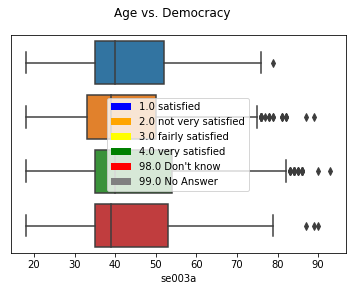

In [19]:
from matplotlib.patches import Patch
import warnings
warnings.filterwarnings('ignore')
fig, ax = plt.pyplot.subplots()

sns.boxplot(x="se003a", y="q098", data=merged_data_copy, orient="h", ax=ax)

ax.get_yaxis().set_visible(False)

fig.suptitle("Age vs. Democracy")

color_patches = [
    Patch(facecolor="blue", label="1.0 satisfied"),
    Patch(facecolor="orange", label="2.0 not very satisfied"),
    Patch(facecolor="yellow", label="3.0 fairly satisfied"),
    Patch(facecolor="green", label="4.0 very satisfied"),
    Patch(facecolor="red", label="98.0 Don't know"),
    Patch(facecolor="grey", label="99.0 No Answer")
]
ax.legend(handles=color_patches);

Text(0.5, 0.98, 'gender vs. Democracy')

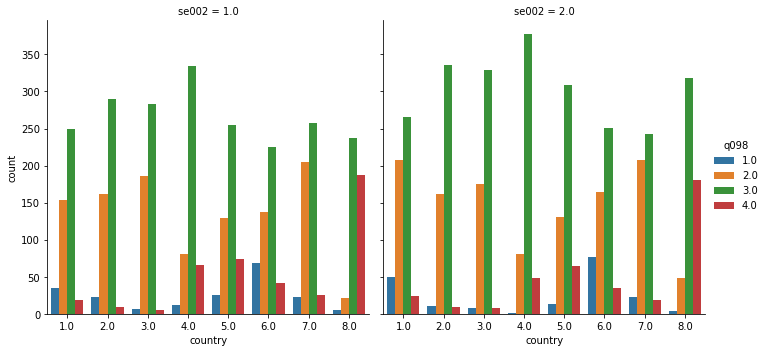

In [20]:
sns.catplot(col="se002", hue="q098", x="country", data=merged_data_copy, kind="count", ax=ax)
fig.suptitle("gender vs. Democracy")

Text(0.5, 0.98, 'Education vs. Democracy')

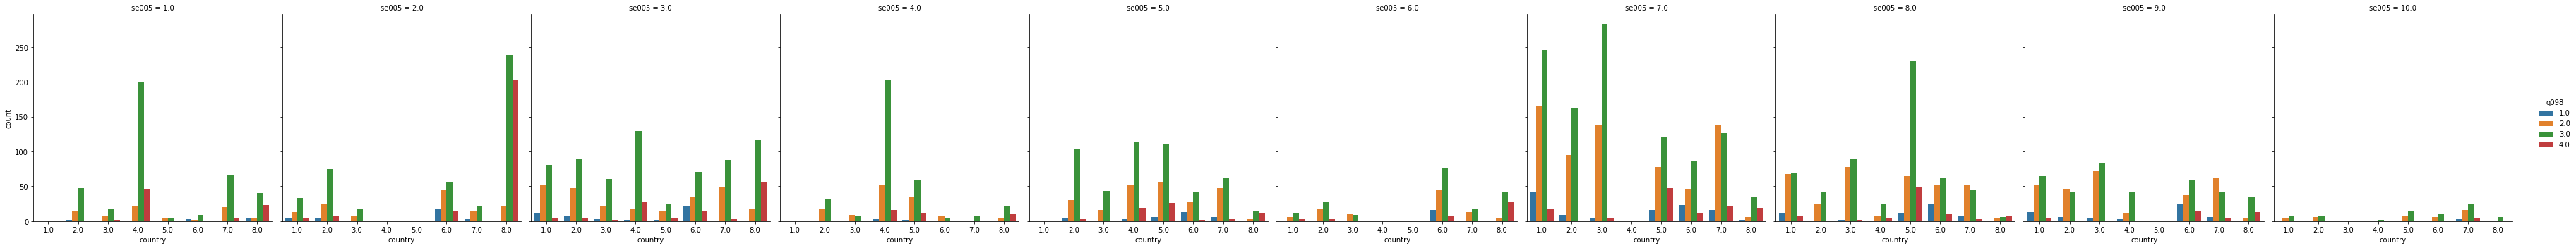

In [21]:
sns.catplot(col="se005", hue="q098", x="country", data=merged_data_copy, kind="count", ax=ax)
fig.suptitle("Education vs. Democracy")

Text(0.5, 0.98, 'Income vs. Democracy')

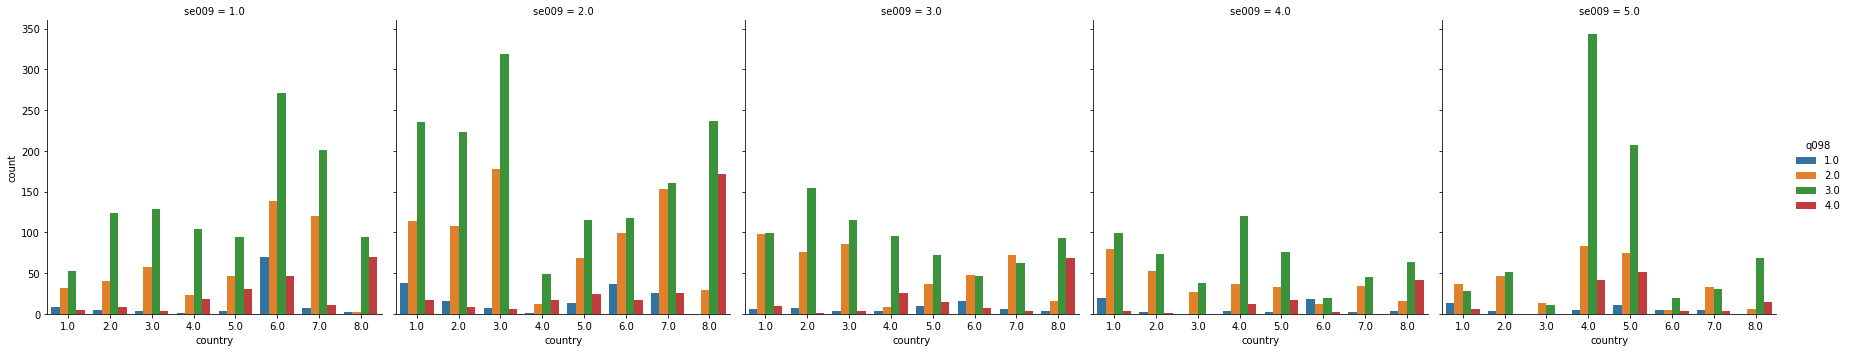

In [22]:
sns.catplot(col="se009", hue="q098", x="country", data=merged_data_copy, kind="count", ax=ax)
fig.suptitle("Income vs. Democracy")

Text(0.5, 0.98, 'Voted last election vs. Democracy')

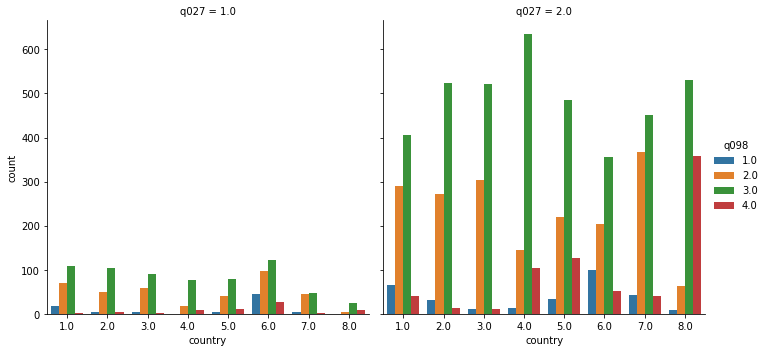

In [23]:
sns.catplot(col="q027", hue="q098", x="country", data=merged_data_copy, kind="count", ax=ax)
fig.suptitle("Voted last election vs. Democracy")

Text(0.5, 0.98, 'Military vs. Democracy')

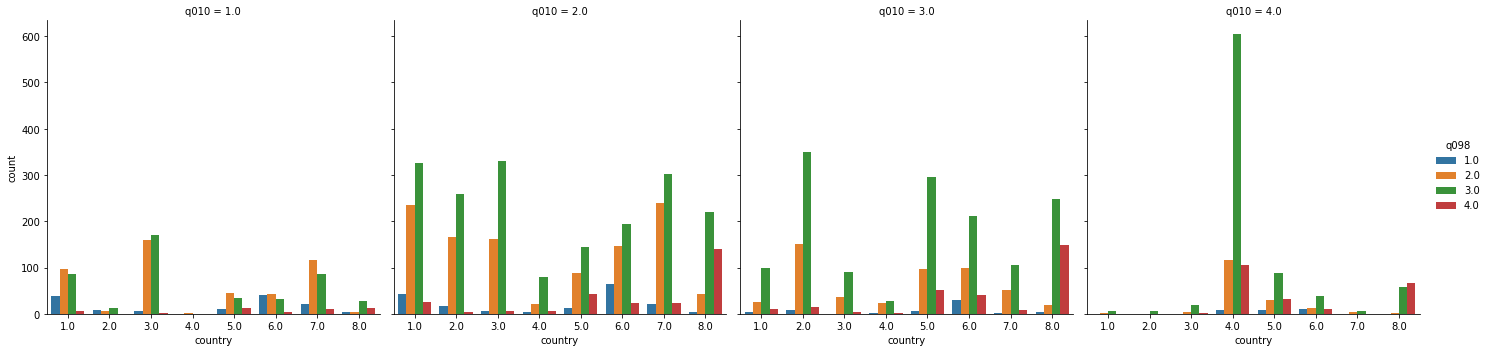

In [24]:
sns.catplot(col="q010", hue="q098", x="country", data=merged_data_copy, kind="count", ax=ax)
fig.suptitle("Military vs. Democracy")

Text(0.5, 0.98, 'Courts vs. Democracy')

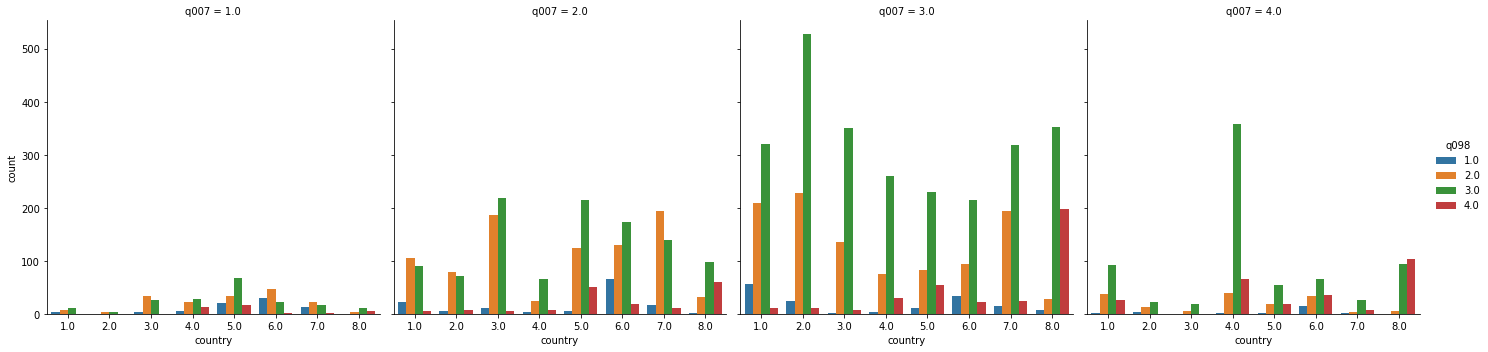

In [25]:
sns.catplot(col="q007", hue="q098", x="country", data=merged_data_copy, kind="count", ax=ax)
fig.suptitle("Courts vs. Democracy")

Text(0.5, 0.98, "Gov't vs. Democracy")

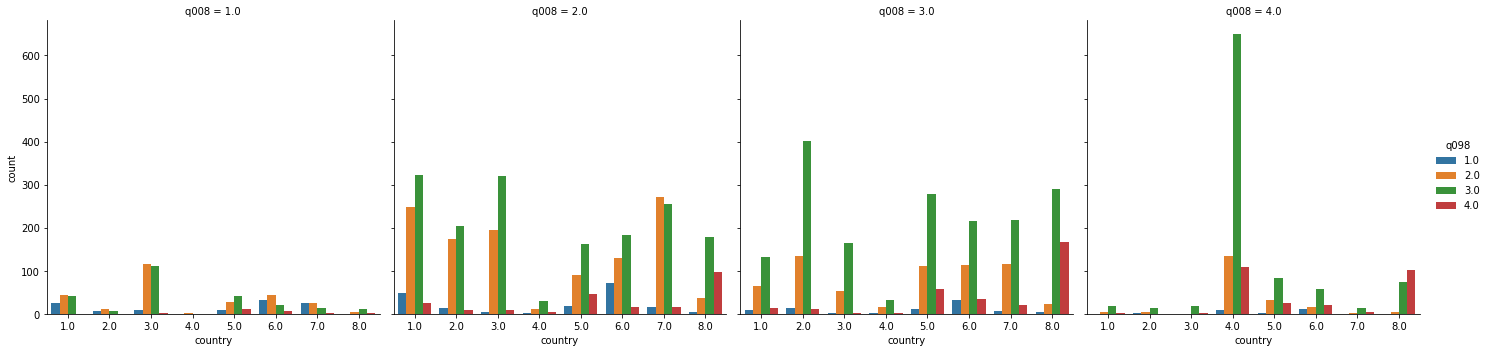

In [26]:
sns.catplot(col="q008", hue="q098", x="country", data=merged_data_copy, kind="count", ax=ax)
fig.suptitle("Gov't vs. Democracy")

Text(0.5, 0.98, 'Civil Service vs. Democracy')

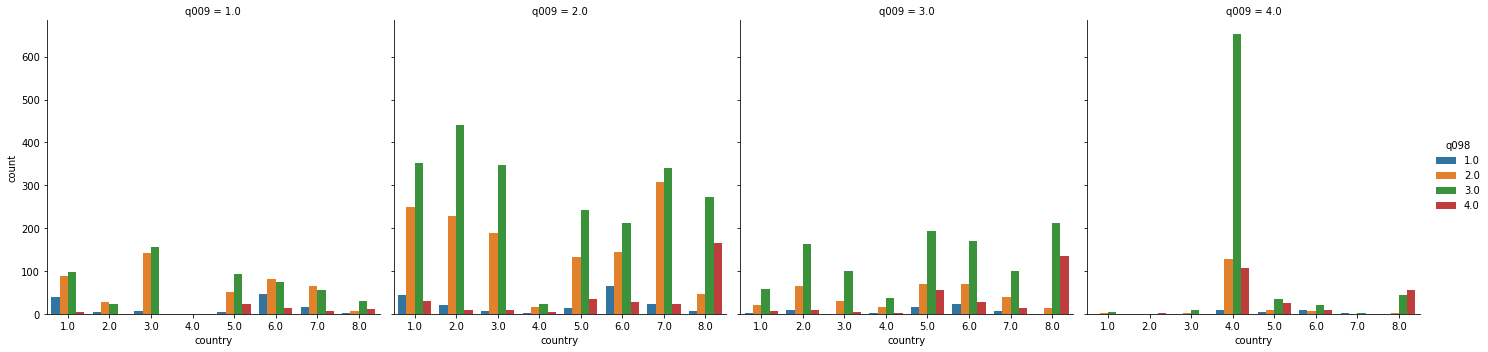

In [27]:
sns.catplot(col="q009", hue="q098", x="country", data=merged_data_copy, kind="count", ax=ax)
fig.suptitle("Civil Service vs. Democracy")

Text(0.5, 0.98, 'Economic situation vs. Democracy')

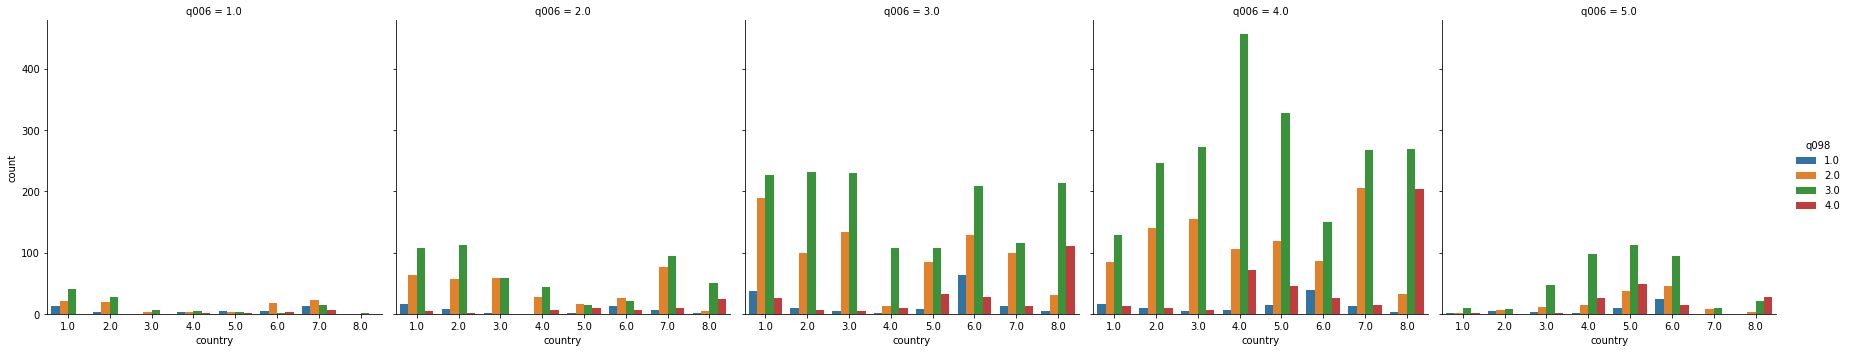

In [28]:
sns.catplot(col="q006", hue="q098", x="country", data=merged_data_copy, kind="count", ax=ax)
fig.suptitle("Economic situation vs. Democracy")

Text(0.5, 0.98, 'Economic Condition vs. Democracy')

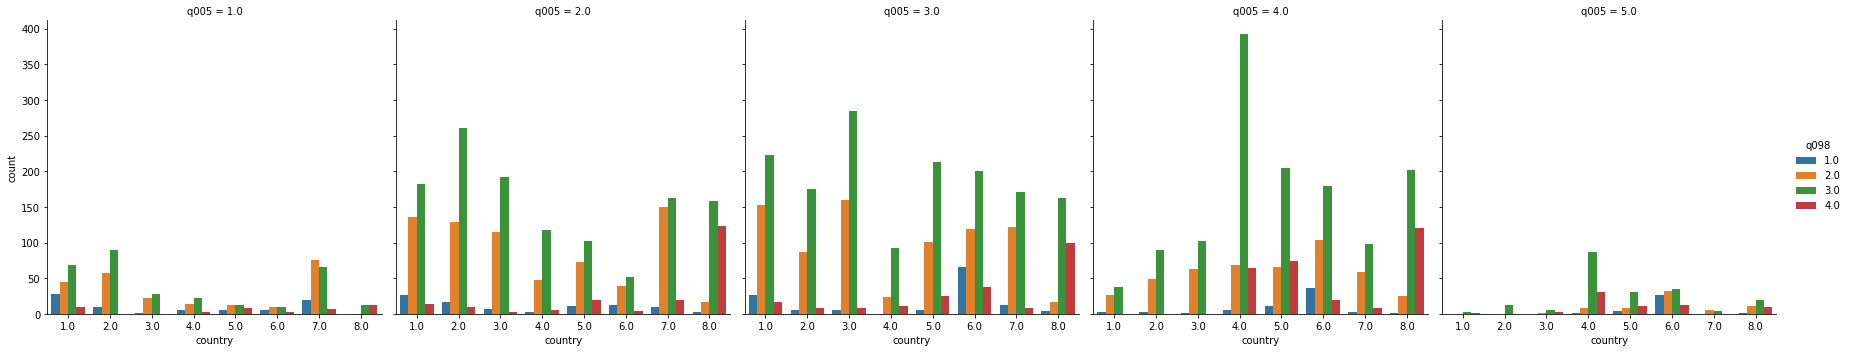

In [29]:
sns.catplot(col="q005", hue="q098", x="country", data=merged_data_copy, kind="count", ax=ax)
fig.suptitle("Economic Condition vs. Democracy")

Text(0.5, 0.98, 'Trust vs. Democracy')

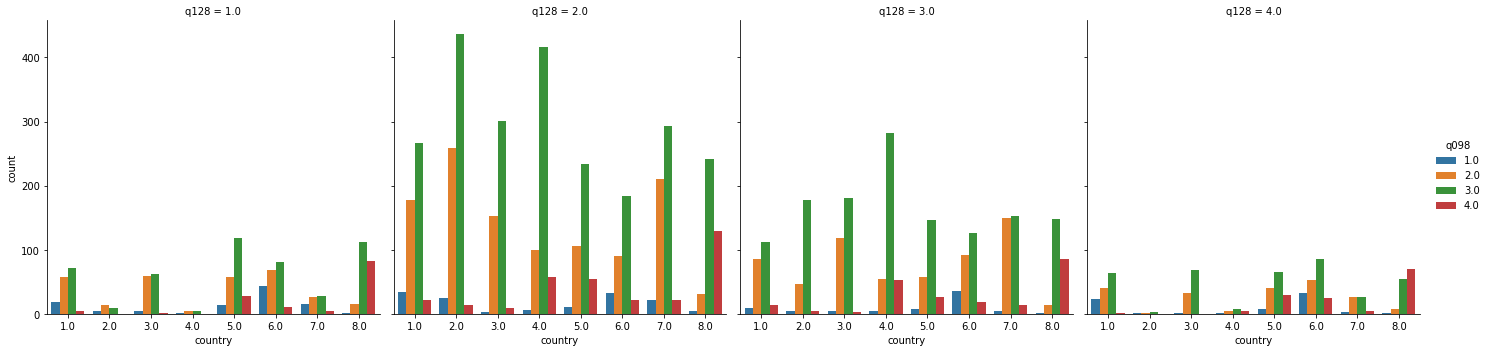

In [30]:
sns.catplot(col="q128", hue="q098", x="country", data=merged_data_copy, kind="count", ax=ax)
fig.suptitle("Trust vs. Democracy")

Text(0.5, 0.98, 'Speech vs. Democracy')

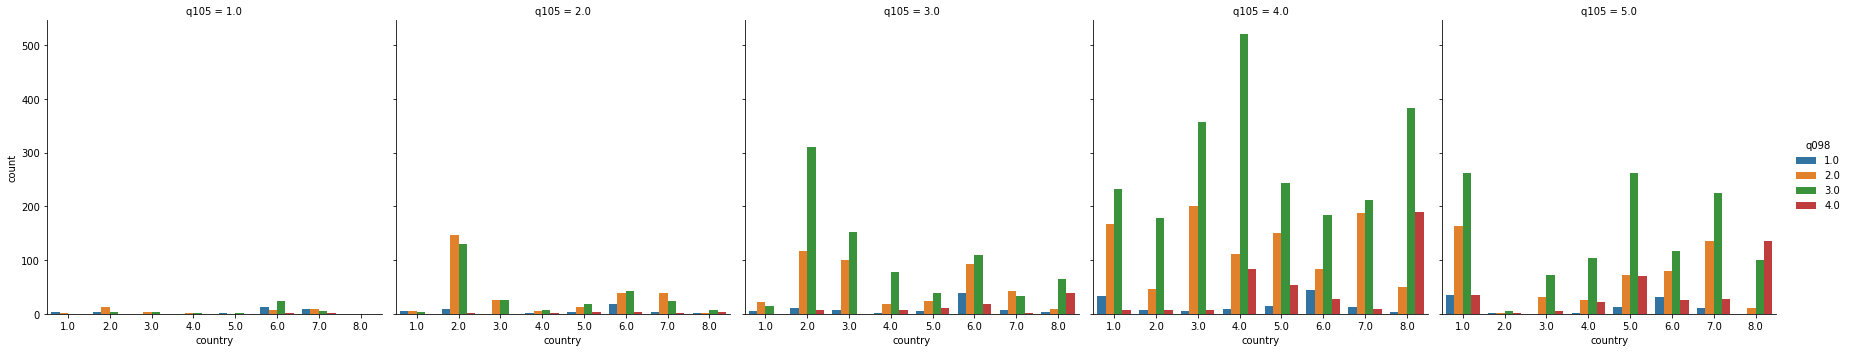

In [31]:
sns.catplot(col="q105", hue="q098", x="country", data=merged_data_copy, kind="count", ax=ax)
fig.suptitle("Speech vs. Democracy")

Text(0.5, 0.98, 'Treatment vs. Democracy')

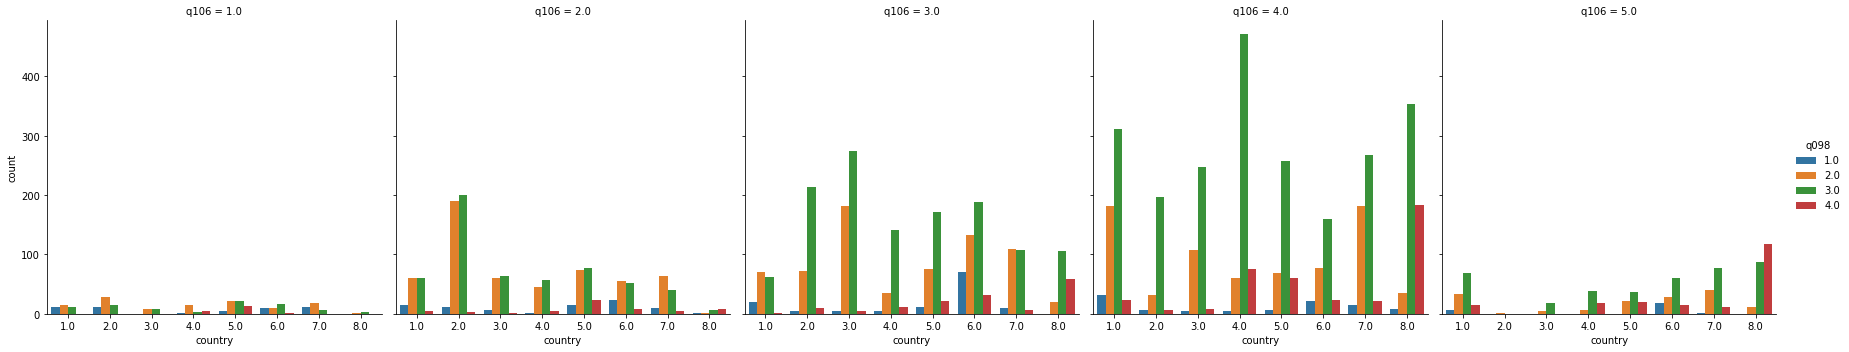

In [32]:
sns.catplot(col="q106", hue="q098", x="country", data=merged_data_copy, kind="count", ax=ax)
fig.suptitle("Treatment vs. Democracy")

Text(0.5, 0.98, 'Military Govern vs. Democracy')

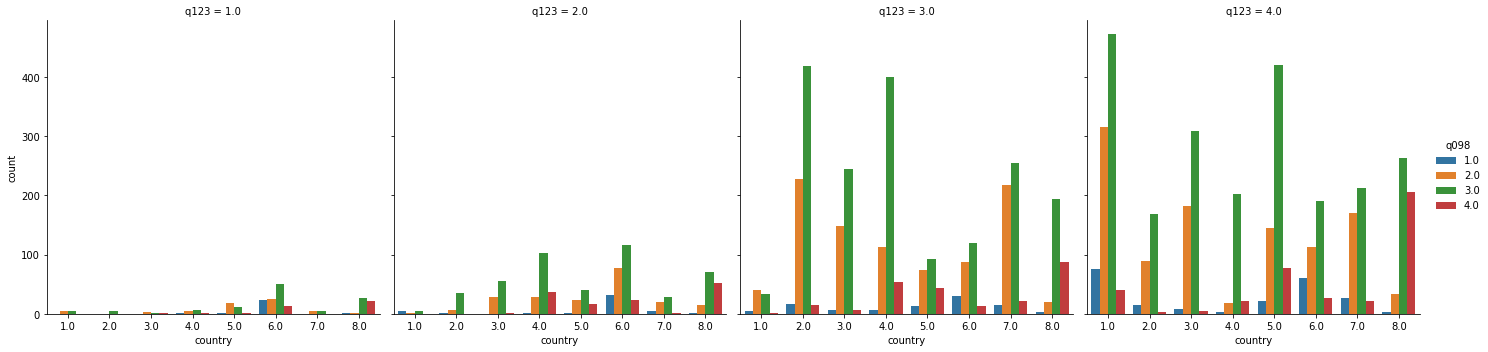

In [33]:
sns.catplot(col="q123", hue="q098", x="country", data=merged_data_copy, kind="count", ax=ax)
fig.suptitle("Military Govern vs. Democracy")

Text(0.5, 0.98, 'Complicated Politics vs. Democracy')

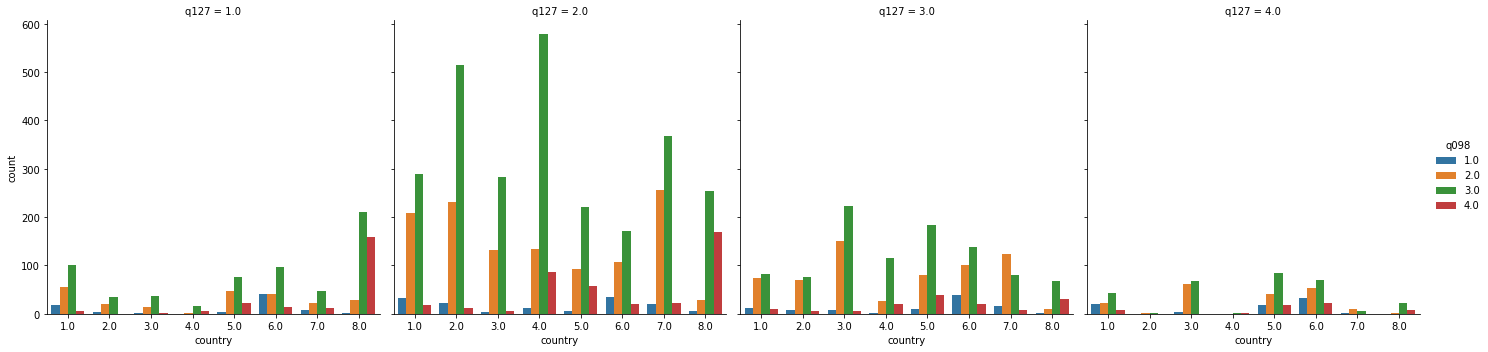

In [34]:
sns.catplot(col="q127", hue="q098", x="country", data=merged_data_copy, kind="count", ax=ax)
fig.suptitle("Complicated Politics vs. Democracy")

### Model Building

In [56]:
import scipy.stats as stats
from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.model_selection import train_test_split

In [57]:
train, test = train_test_split(merged_data_copy, test_size=0.25, random_state=0, shuffle=False)

In [58]:
model = OrderedModel(train['q098'], 
                     train[['se002', 'se005', 'se009', 'se003a', 'country', 'q007', 'q008', 
                                      'q009', 'q010', 'q006', 'q128', 'q005', 'q027', 'q105', 'q106', 
                                       'q123', 'q127']], 
                     distr='probit')

In [59]:
res_prob = model.fit(method='bfgs')
res_prob.summary()

Optimization terminated successfully.
         Current function value: 0.941084
         Iterations: 31
         Function evaluations: 36
         Gradient evaluations: 36


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                   q098   Log-Likelihood:                -5646.5
Model:                   OrderedModel   AIC:                         1.133e+04
Method:            Maximum Likelihood   BIC:                         1.147e+04
Date:                Sat, 06 Nov 2021                                         
Time:                        17:46:41                                         
No. Observations:                6000                                         
Df Residuals:                    5980                                         
Df Model:                          20                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
se002         -0.0213      0.030     -0.714      0.475      -0.080       0.037
se005         -0.0225      0.007     -3.018      0.003      -0.037      -0.008
se009         -0.0316      0.012     -2.727      0.006      -0.054      -0.009
se003a         0.0009      0.001      0.707      0.480      -0.002       0.003
country       -0.0114      0.011     -1.066      0.286      -0.032       0.010
q007           0.1405      0.021      6.546      0.000       0.098       0.183
q008           0.0932      0.025      3.775      0.000       0.045       0.142
q009           0.0545      0.024      2.292      0.022       0.008       0.101
q010           0.1458      0.024      6.057      0.000       0.099       0.193
q006           0.0941      0.018      5.354      0.000       0.060       0.129
q128           0.0440      0.019      2.362      0.018       0.007       0.080
q005           0.0626      0.017      3.730      0.000       0.030       0.096
q027           0.0782      0.039      1.982      0.048       0.001       0.156
q105           0.0822      0.018      4.612      0.000       0.047       0.117
q106           0.1471      0.017      8.537      0.000       0.113       0.181
q123           0.0384      0.020      1.880      0.060      -0.002       0.078
q127          -0.0378      0.020     -1.932      0.053      -0.076       0.001
1.0/2.0        0.7122      0.173      4.117      0.000       0.373       1.051
2.0/3.0        0.2829      0.022     13.156      0.000       0.241       0.325
3.0/4.0        0.7286      0.015     49.646      0.000       0.700       0.757
==============================================================================
"""

In [60]:
predicted = res_prob.model.predict(res_prob.params, 
                                   exog=test[['se002', 'se005', 'se009', 'se003a', 
                                    'country', 'q007', 'q008', 
                                      'q009', 'q010', 'q006', 'q128', 'q005', 'q027', 'q105', 'q106', 
                                       'q123', 'q127']])
predicted

array([[0.0402152 , 0.29659778, 0.61382404, 0.04936298],
       [0.0114224 , 0.15988721, 0.69802172, 0.13066867],
       [0.03266403, 0.27026698, 0.6372446 , 0.05982439],
       ...,
       [0.01679155, 0.19563654, 0.6862781 , 0.10129381],
       [0.04903307, 0.32269319, 0.58777728, 0.04049645],
       [0.01749613, 0.19977852, 0.68434022, 0.09838513]])

In [61]:
# Accuracy test
import numpy as np
pred_choice = predicted.argmax(1)
print((np.asarray(test['q098'].values.codes)==pred_choice).mean())

0.547
